In [61]:
!pip install librosa numpy pandas torch torchaudio tensorflow tensorflow-hub pydub soundfile matplotlib scipy tqdm

In [62]:
!git clone https://github.com/JaesungHuh/voice-gender-classifier.git
%cd voice-gender-classifier
!pip install -r requirements.txt

Cloning into 'voice-gender-classifier'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 74 (delta 38), reused 41 (delta 17), pack-reused 0 (from 0)
Receiving objects: 100% (74/74), 431.92 KiB | 4.00 MiB/s, done.
Resolving deltas: 100% (38/38), done.
/Users/madisonfields/voice-gender-classifier/voice-gender-classifier/voice-gender-classifier/voice-gender-classifier/voice-gender-classifier


In [63]:

path = '***/for-original/training/real'
wav_path = '***/for-original/training/real'


import os

# print count of files
num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
print(f"Number of files in '{path}': {num_files}")

Number of files in '/Users/madisonfields/Downloads/for-original/training/real': 26941


In [64]:


# print count of files
num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
print(f"Number of files in '{path}': {num_files}")

Number of files in '/Users/madisonfields/Downloads/for-original/training/real': 26941


In [65]:
pip install torchaudio speechbrain openai-whisper

Note: you may need to restart the kernel to use updated packages.


In [66]:
import os
os.environ['HF_HOME'] = '***/huggingface_cache'

In [67]:
import os
from speechbrain.pretrained import EncoderClassifier
from collections import Counter
from speechbrain.utils.fetching import LocalStrategy


In [68]:
!pip install transformers

from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
from model import ECAPA_gender

# Load the pretrained model and tokenizer from the Hugging Face Model Hub
# You could directly download the model from the huggingface model hub
model = ECAPA_gender.from_pretrained("JaesungHuh/voice-gender-classifier")
model.eval()

# If you are using gpu .... 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Load the audio file and use predict function to directly get the output
example_file = '***/release_in_the_wild/25.wav'
with torch.no_grad():
    output = model.predict(example_file, device=device)
    print("Gender : ", output)

config.json:   0%|          | 0.00/15.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/61.9M [00:00<?, ?B/s]

Gender :  female


        Filename  Gender
0   file9148.wav  female
1  file20430.wav  female
2   file1514.wav  female
3  file11835.wav    male
4  file16182.wav    male
5   file7165.wav    male
6  file29372.wav    male
7  file26041.wav    male
8   file8256.wav  female
9  file25548.wav  female

Gender Distribution for Processed Files:
male: 13388
female: 13553
other: 0


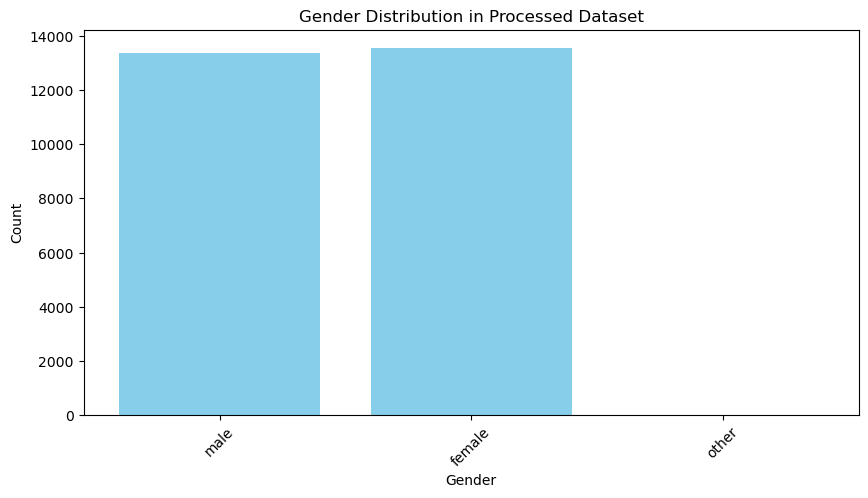

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
from speechbrain.pretrained import EncoderClassifier

gender_counts = {'male': 0, 'female': 0, 'other': 0}  # Modify as per actual gender categories
file_gender_map = {}

def process_file(file, wav_path):
    try:
        file_path = os.path.join(wav_path, file)
        with torch.no_grad():
            output = model.predict(file_path, device=device)
            
        if output == "female":
            gender_counts['female'] += 1
        elif output == "male":
            gender_counts['male'] += 1
        else:
            gender_counts['other'] += 1 
        # Check if the output is valid
        
        file_gender_map[file] = output 
        return file, output
        #return file, predicted_gender

    except Exception as e:
        # Print the exception and the file that caused it
        print(f"Error processing {file}: {e}")
        return file, "error"  # Return "error" if something goes wrong

# Execution for first 10 files
if os.path.exists(path):
    wav_files = [f for f in os.listdir(path) if f.endswith(".wav")]
    total_files = wav_files  # Limit to first 10 files (or less if less than 10)
    #print(f"Processing {total_files} files...")

    results = []
    for i, file in enumerate(wav_files):  # Iterate over the list of files
        #print(f"Processing file {i+1}/{len(wav_files)}: {file}")  # Show current progress
        result = process_file(file, wav_path)  # Process each individual file
        #print(f"Result for {file}: {result}")  # Print check
        results.append(result)  # Add the result to the results list
        # Save result to df or further processing
    df = pd.DataFrame(file_gender_map.items(), columns=["Filename", "Gender"])

    # print sample results
    print(df.head(10))

    # print gender distribution
    print("\nGender Distribution for Processed Files:")
    for gender, count in gender_counts.items():
        print(f"{gender}: {count}")


    # plot gender distribution
    plt.figure(figsize=(10, 5))
    plt.bar(gender_counts.keys(), gender_counts.values(), color='skyblue')
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.title("Gender Distribution in Processed Dataset")
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"Error: Directory '{path}' not found!")

In [70]:
results

[('file9148.wav', 'female'),
 ('file20430.wav', 'female'),
 ('file1514.wav', 'female'),
 ('file11835.wav', 'male'),
 ('file16182.wav', 'male'),
 ('file7165.wav', 'male'),
 ('file29372.wav', 'male'),
 ('file26041.wav', 'male'),
 ('file8256.wav', 'female'),
 ('file25548.wav', 'female'),
 ('file32034.wav', 'female'),
 ('file3303.wav', 'male'),
 ('file22227.wav', 'female'),
 ('file24656.wav', 'male'),
 ('file5772.wav', 'female'),
 ('file24130.wav', 'female'),
 ('file5014.wav', 'male'),
 ('file34323.wav', 'male'),
 ('file13944.wav', 'female'),
 ('file3465.wav', 'female'),
 ('file12482.wav', 'female'),
 ('file32752.wav', 'male'),
 ('file7603.wav', 'female'),
 ('file29414.wav', 'female'),
 ('file18811.wav', 'male'),
 ('file26727.wav', 'female'),
 ('file8530.wav', 'female'),
 ('file21048.wav', 'female'),
 ('file1272.wav', 'female'),
 ('file30145.wav', 'male'),
 ('file27439.wav', 'female'),
 ('file10295.wav', 'female'),
 ('file29400.wav', 'male'),
 ('file8524.wav', 'male'),
 ('file26733.wav', '

In [71]:
df.head(20)



,Filename,Gender
0,file9148.wav,female
1,file20430.wav,female
2,file1514.wav,female
3,file11835.wav,male
4,file16182.wav,male
5,file7165.wav,male
6,file29372.wav,male
7,file26041.wav,male
8,file8256.wav,female
9,file25548.wav,female


In [35]:
#df.to_csv("gender_results_inthewild.csv", index=False)

In [72]:
import os

# Get the current working directory
current_directory = os.getcwd()

print("Current working directory:", current_directory)

Current working directory: /Users/madisonfields/voice-gender-classifier/voice-gender-classifier/voice-gender-classifier/voice-gender-classifier/voice-gender-classifier


In [73]:
#Accent Classification


import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
from speechbrain.pretrained import EncoderClassifier

# Load the pre-trained accent classifier
classifier = EncoderClassifier.from_hparams(
    source="Jzuluaga/accent-id-commonaccent_ecapa",
    savedir="pretrained_models/accent-id-commonaccent_ecapa",
    run_opts={"device": "cpu"}  # change to "cuda" if GPU is available - if using google colab, will be better i think
)

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'Jzuluaga/accent-id-commonaccent_ecapa' if not cached


hyperparams.yaml:   0%|          | 0.00/1.82k [00:00<?, ?B/s]

INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'Jzuluaga/accent-id-commonaccent_ecapa' if not cached
INFO:speechbrain.utils.fetching:Fetch embedding_model.ckpt: Fetching from HuggingFace Hub 'Jzuluaga/accent-id-commonaccent_ecapa' if not cached


embedding_model.ckpt:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

INFO:speechbrain.utils.fetching:Fetch classifier.ckpt: Fetching from HuggingFace Hub 'Jzuluaga/accent-id-commonaccent_ecapa' if not cached


classifier.ckpt:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

INFO:speechbrain.utils.fetching:Fetch accent_encoder.txt: Fetching from HuggingFace Hub 'Jzuluaga/accent-id-commonaccent_ecapa' if not cached


accent_encoder.txt:   0%|          | 0.00/297 [00:00<?, ?B/s]

INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: embedding_model, classifier, label_encoder


Processing 26941 files using 8 threads...
Saved accent classification results to 'accent_classification_results_foreal.csv'.

Sample Results (First 10):
        Filename  Gender     accent
0   file9148.wav  female         us
1  file20430.wav  female     canada
2   file1514.wav  female    england
3  file11835.wav    male         us
4  file16182.wav    male    england
5   file7165.wav    male     indian
6  file29372.wav    male  australia
7  file26041.wav    male         us
8   file8256.wav  female         us
9  file25548.wav  female         us

Accent Distribution for In-the-Wild Dataset:
us: 18285
canada: 3130
england: 2586
indian: 1230
australia: 730
singapore: 22
african: 90
scotland: 706
ireland: 39
bermuda: 28
southatlandtic: 4
newzealand: 54
malaysia: 7
hongkong: 18
philippines: 9
wales: 3


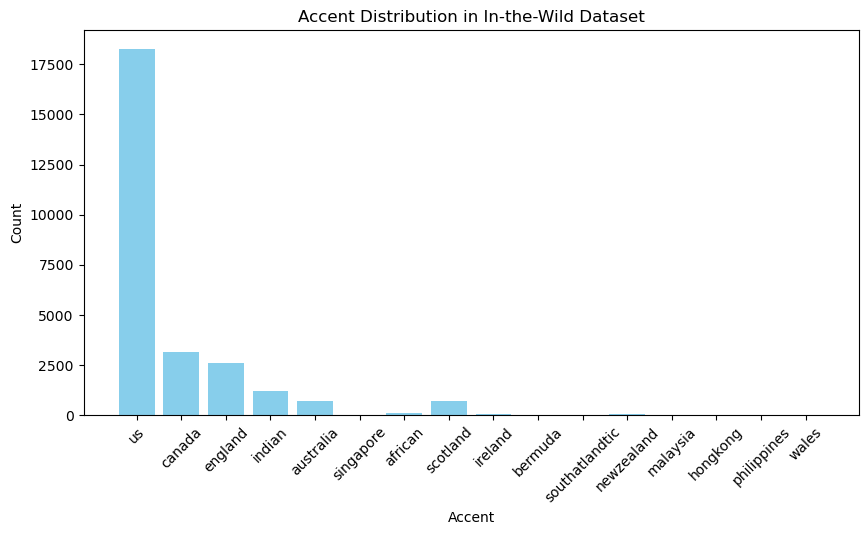

In [74]:
# func to process a single file
def process_file(file):
    try:
        file_path = os.path.join(wav_path, file)
        predicted_accent = classifier.classify_file(file_path)[-1][0]  # extract first result
        return file, predicted_accent
    except Exception as e:
        print(f"Error processing {file}: {e}")
        return file, "error"

if os.path.exists(wav_path):
    # get list of all .wav files
    wav_files = [f for f in os.listdir(wav_path) if f.endswith(".wav")]

    print(f"Processing {len(wav_files)} files using {os.cpu_count()} threads...")

    # use ThreadPoolExecutor for parallel execution
    with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
        results = list(executor.map(process_file, wav_files))

    # convert results to a dictionary
    file_accent_map = {file: accent for file, accent in results if accent != "error"}
    accent_counts = Counter(file_accent_map.values())

    # save results to CSV
    df['accent'] = df['Filename'].map(file_accent_map)
    df.to_csv("accent_classification_results_foreal.csv", index=False)
    print("Saved accent classification results to 'accent_classification_results_foreal.csv'.")

    # print sample results
    print("\nSample Results (First 10):")
    print(df.head(10))

    # print accent distribution
    print("\nAccent Distribution for In-the-Wild Dataset:")
    for accent, count in accent_counts.items():
        print(f"{accent}: {count}")

    # plot accent distribution
    plt.figure(figsize=(10, 5))
    plt.bar(accent_counts.keys(), accent_counts.values(), color='skyblue')
    plt.xlabel("Accent")
    plt.ylabel("Count")
    plt.title("Accent Distribution in In-the-Wild Dataset")
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"Error: Directory '{wav_path}' not found!")

In [76]:
import os

# Get the current working directory
current_directory = os.getcwd()

print("Current working directory:", current_directory)

Current working directory: /Users/madisonfields/voice-gender-classifier/voice-gender-classifier/voice-gender-classifier/voice-gender-classifier/voice-gender-classifier


In [77]:
df.head(20)

,Filename,Gender,accent
0,file9148.wav,female,us
1,file20430.wav,female,canada
2,file1514.wav,female,england
3,file11835.wav,male,us
4,file16182.wav,male,england
5,file7165.wav,male,indian
6,file29372.wav,male,australia
7,file26041.wav,male,us
8,file8256.wav,female,us
9,file25548.wav,female,us


In [78]:
df.to_csv("full_train_foreal_real.csv", index = False)